In [1]:
import click
import logging
from pathlib import Path
import os
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.functional import normalize
import matplotlib.pyplot as plt

C:\Users\meki\Anaconda3\envs\my_env\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\meki\Anaconda3\envs\my_env\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [3]:
images, labels = [], []

for i in range(5):
    traindata = np.load(f"../data/raw/corruptmnist/train_{i}.npz")
    images.append(traindata["images"])
    labels.append(traindata["labels"])
    
images = torch.FloatTensor(np.concatenate(images))
labels = torch.LongTensor(np.concatenate(labels))
normalize(images)
trainset = TensorDataset(images, labels)

# load and transform test
testdata = np.load('../data/raw/corruptmnist/test.npz')

test_images = torch.FloatTensor(testdata["images"])
test_labels = torch.LongTensor(testdata["labels"])
normalize(test_images)
testset = TensorDataset(test_images,  test_labels)

In [13]:
example = test_images[:10]
torch.save(example, '../data/processed/example_data.pt')

In [2]:
t = torch.load('../data/processed/train_mnist.pt')

In [31]:
list(t[:][0].shape) == [25000, 28,28]

False

In [32]:
list(t[:][0].shape)

[25000, 28, 28]

In [16]:
np.unique(t[:][1])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [20]:
np.all(np.arange(10) == np.unique(t[:][1]))

True

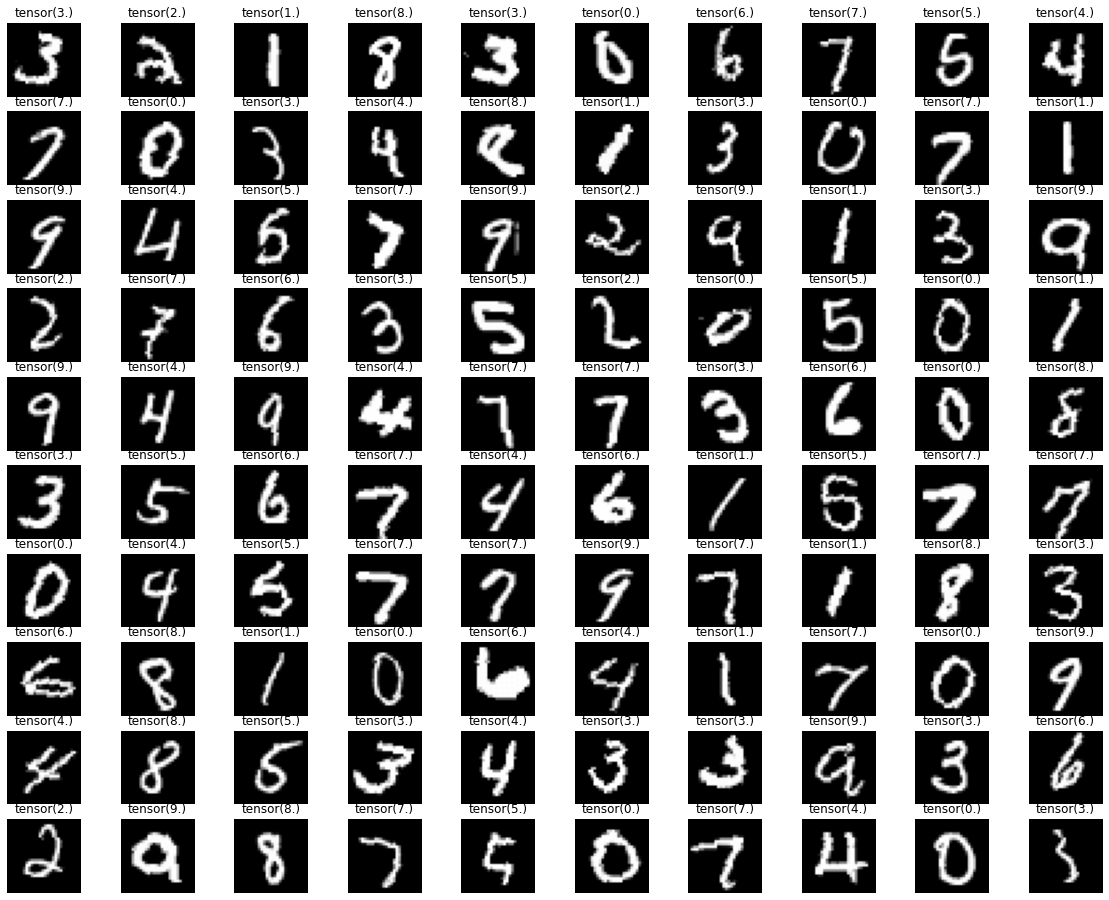

In [69]:
figure = plt.figure(figsize=(20, 16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

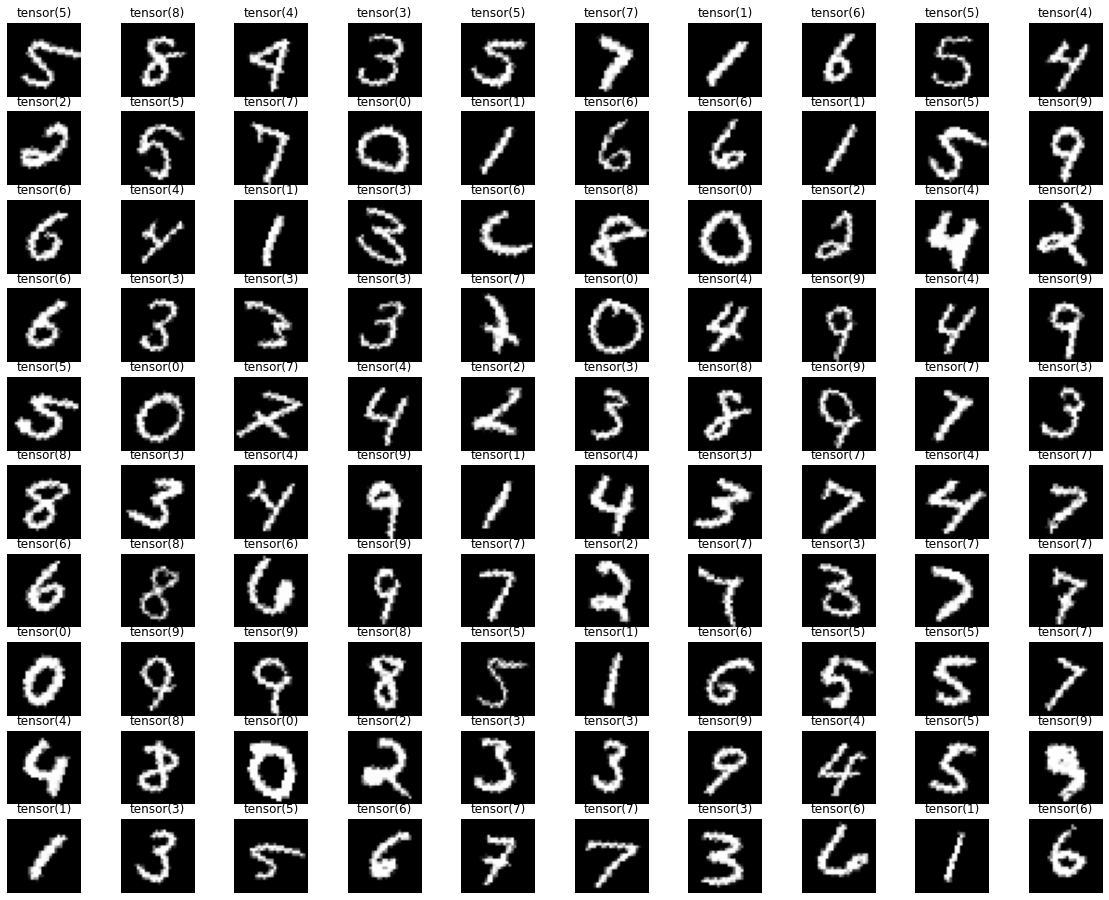

In [66]:
figure = plt.figure(figsize=(20, 16))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(testset), size=(1,)).item()
    img, label = testset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()